#Wedding Keyword SEO Exploratory Data Analysis

##by  <a href="mailto:kevhung11@gmail.com">Kevin</a>  and Brian

### Loading Brian's Macy's SEO Data

In [1]:
import pandas as pd

In [2]:
wedding_df = pd.read_csv("data/Wedding Keyword Scrape.csv")
wedding_df.head()

,Keyword,Rank,Title,Link,Description
0,wedding gifts,1,"Unique Wedding Gifts, Cool Gift Ideas | Uncomm...",www.uncommongoods.com/occasions/wedding-gifts,Discover unique wedding gifts at UncommonGoods...
1,wedding gifts,2,Wedding Gifts: Unique Bride &amp; Groom Gifts ...,www.personalizationmall.com/Personalized-Weddi...,Find the best collection of personalized weddi...
2,wedding gifts,3,Personalized Wedding Gifts at Things Remembered,www.thingsremembered.com/section/Wedding/2114.uts,Personalized wedding gifts that will make this...
3,wedding gifts,4,Popular items for wedding gift on Etsy,https://www.etsy.com/market/wedding_gift,"Shop outside the big box, with unique items fo..."
4,wedding gifts,5,ENGAGEMENT &amp; WEDDING GIFTS - Gifts.com,https://www.gifts.com/ideas/wedding,"When you think about it, buying a wedding gift..."


### Number of Records

In [4]:
len(wedding_df)

1411

### Keywords

tutorial: https://majid.info/blog/inserting-graphviz-diagrams-in-a-cvstrac-wiki/

In [3]:
from collections import Counter
from operator import itemgetter

word_counter = reduce(lambda wc, wl : wc + Counter(wl.split()), wedding_df.Keyword.unique(), Counter())
n_unique_keywords = len(word_counter)
print n_unique_keywords
print
print word_counter.most_common(10)
least_common = word_counter.most_common(n_unique_keywords)[-10:]
print
print least_common

74

[('wedding', 109), ('gift', 61), ('registry', 49), ('ideas', 43), ('bride', 38), ('gifts', 37), ('for', 29), ('groom', 23), ('best', 17), ('online', 14)]

[('items', 1), ('diy', 1), ('bay', 1), ('360', 1), ('reception', 1), ('invitation', 1), ('cake', 1), ('fall', 1), ('myers', 1), ('my', 1)]


tutorial: http://stackoverflow.com/questions/22207802/pygraphviz-networkx-set-node-level-or-layer

### Number of Unique Keyword Words

In [200]:
sum(pd.Series(word_counter)==1)

50

In [71]:
len(word_counter)

74

### Number of Unique Keyword <b>Phrases</b>

In [72]:
len(wedding_df.Keyword.unique())

142

### Keyword Phrase Stats

In [114]:
kwphrase_lengths = map(lambda kwphrase : len(kwphrase.split()) , wedding_df.Keyword.unique())
avg_length = sum(kwphrase_lengths)/float(len(kwphrase_lengths))
print avg_length
print max(kwphrase_lengths)
print min(kwphrase_lengths)

3.80281690141
8
2


* Search phrases are about 3-4 words on average
* longest phrase is 8 words
* shortest phrase is 2 words

In [27]:
import matplotlib.pyplot as plt
from IPython.display import Image, HTML
%matplotlib inline
pd.options.display.mpl_style = 'default'

In [284]:
!mkdir -p ./wordgraph

In [13]:
import networkx as nx
import pygraphviz as pgv

from nltk import bigrams, tokenize

G = nx.DiGraph()
degdict = dict.fromkeys(word_counter.keys(), 0)

for kw in wedding_df.Keyword.unique():
    for (w1, w2) in bigrams(tokenize.word_tokenize(kw)):
        degdict[w1] += 1
        degdict[w2] += 1
        G.add_edge(w1, w2)        

#A = nx.to_agraph(G)
#A.draw('all_words.png', prog='dot')
        
blank_wedding = ['unusual', 'winter', 'personalised', 'beach', 'small', 'unique', 'diy', 'fall', 'personalized', 'outdoor']
registry_blank = ['nz','items','uk','360','search','finder', 'wording']
wedding_blank_ideas = ['flowers', 'presents', 'music', 'flower', 'stationery', 'photo', 'reception', 'invitation', 'present', 'cake', 'theme', 'ceremony']
wedding_blank_online = ['registries', 'dress', 'invitations', 'dresses']
blank_of = ['mother', 'father']
for_blank = ['summer', 'brides']
blank_gift= ['kohl', 'alternative', 'birthday', 'baby', 'myers', 'bay', 'my', 'housewarming', 'house', 'honeymoon']

for w in blank_wedding: G.remove_node(w)
G.add_edge(' / '.join(sorted(blank_wedding)[:3]) +
           '\\n' + ' / '.join(sorted(blank_wedding)[3:6]) + '\\n' + ' / '.join(sorted(blank_wedding)[6:]), 'wedding')

for w in registry_blank: G.remove_node(w)
G.add_edge('registry', ' / '.join(sorted(registry_blank)[:3]) + '\\n' + ' / '.join(sorted(registry_blank)[3:]))

for w in wedding_blank_ideas: G.remove_node(w)
sorted_blank = sorted(wedding_blank_ideas)
sorted_blank_string = ' / '.join(sorted_blank[:len(sorted_blank)/3]) + '\\n' + ' / '.join(sorted_blank[len(sorted_blank)/3:2*len(sorted_blank)/3]) + '\\n' + ' / '.join(sorted_blank[-len(sorted_blank)/3:])
G.add_edge('wedding', sorted_blank_string)
G.add_edge(sorted_blank_string, 'ideas')

for w in wedding_blank_online: G.remove_node(w)
blank_sorted = ' / '.join(sorted(wedding_blank_online)[:len(wedding_blank_online)/2]) + '\\n' + ' / '.join(sorted(wedding_blank_online)[len(wedding_blank_online)/2:])
G.add_edge('wedding', blank_sorted)
G.add_edge(blank_sorted, 'online')

for w in blank_gift: G.remove_node(w)
G.add_edge("""alternative / baby / bay\\nbirthday / honeymoon / house\\nhousewarming / kohl / my / myers""",  'gift')
    
try:
    pos=nx.graphviz_layout(G)
except:
    pos=nx.spring_layout(G,iterations=20)

#plt.figure(figsize=(16,16))
#nx.draw_networkx_edges(G,pos)
#nx.draw_networkx_nodes(G,pos)
#nx.draw_networkx_labels(G,pos)
    
A = nx.to_agraph(G)
A.node_attr.update(Color='red')
A.draw('./wordgraph/aw.png', prog='dot')

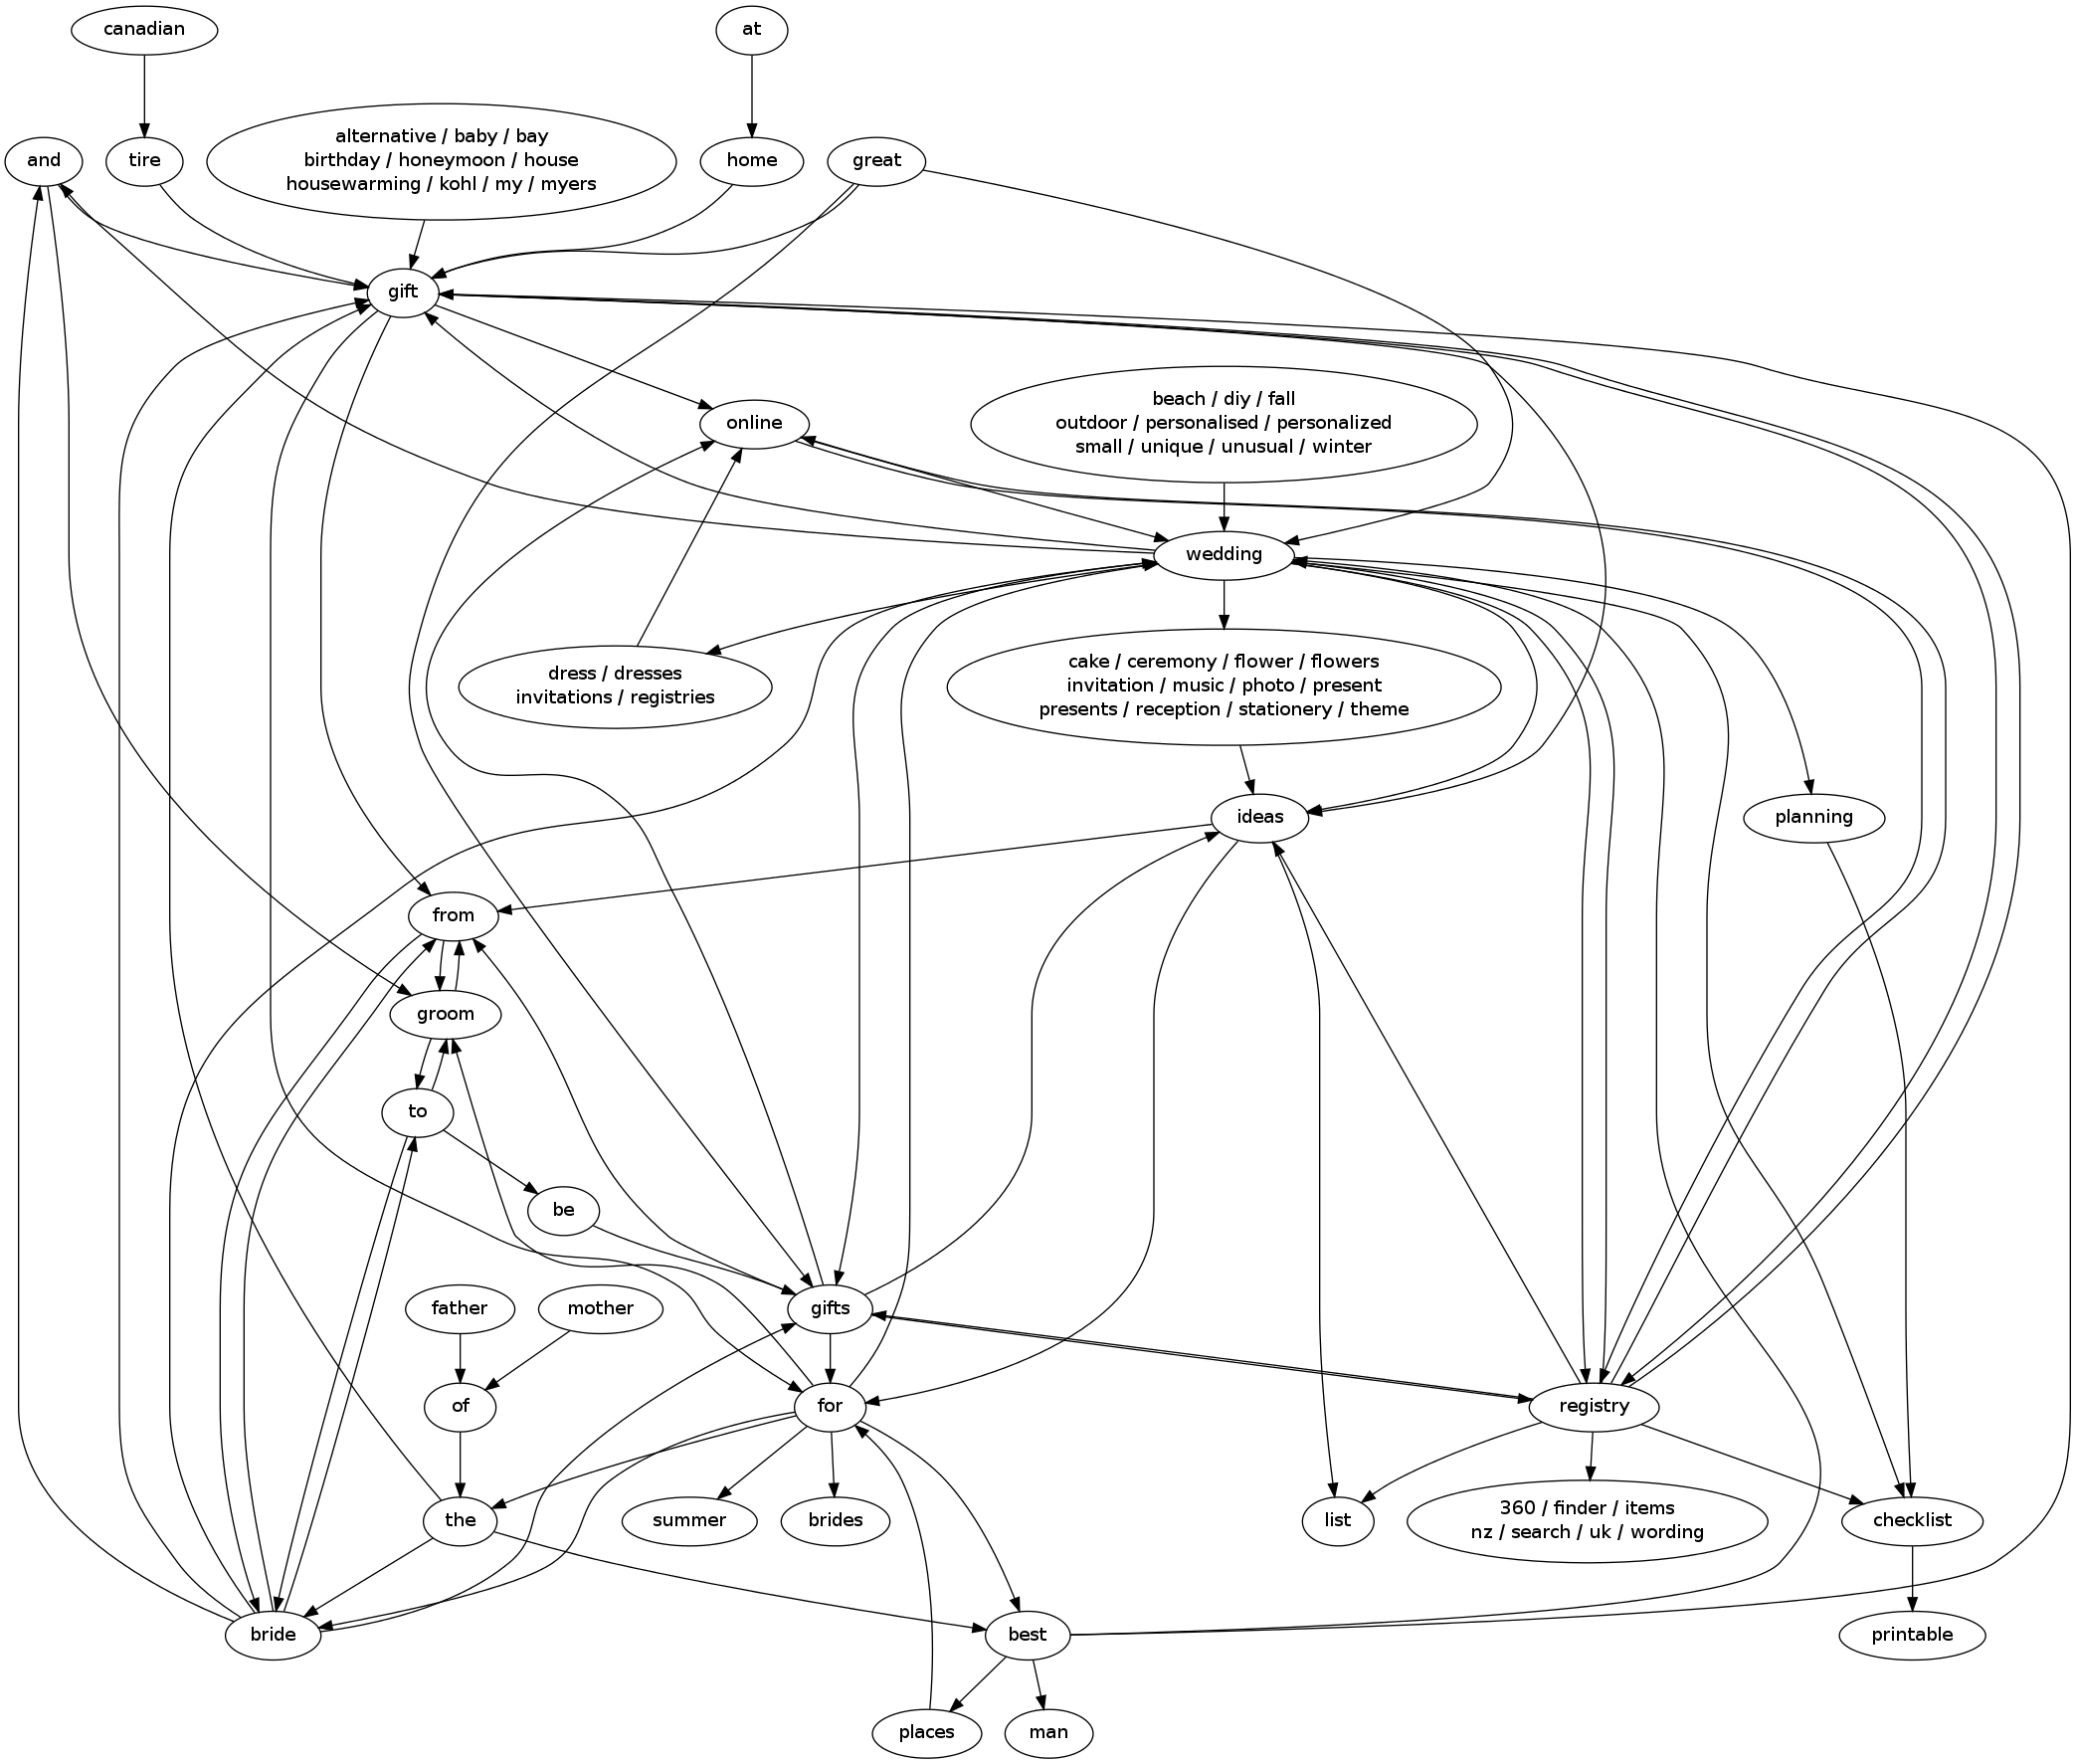

In [8]:
#Image('./wordgraph/all_words.png')
Image('./wordgraph/aw.png', width=1000, height=1000)

In [14]:
# EDGE COUNTS
d3_link_csv_dict = dict.fromkeys(A.edges(), 0)

for kw in wedding_df.Keyword.unique():
    for bi in bigrams(tokenize.word_tokenize(kw)):
        if bi in d3_link_csv_dict:            
            d3_link_csv_dict[bi] += 1

for k in d3_link_csv_dict.keys():
    if '/' in k[0]:
        html_key = k[0].replace('/', '').replace('\\n','\n')
        d3_link_csv_dict[(k[0].replace('\\n', '\n'), k[1])] = len(html_key.split())
        del d3_link_csv_dict[k]
    if '/' in k[1]:
        html_key = k[1].replace('/', '').replace('\\n','\n')
        d3_link_csv_dict[(k[0], k[1].replace('\\n', '\n'))] = len(html_key.split())
        del d3_link_csv_dict[k]

In [15]:
# NODE DEGREES
d3_node_csv_dict = dict.fromkeys(A.nodes(), 0)

for kw in wedding_df.Keyword.unique():
    for bi in bigrams(tokenize.word_tokenize(kw)):
        w1, w2 = bi
        
        if w1 in d3_node_csv_dict:
            d3_node_csv_dict[w1] += 1
        if w2 in d3_node_csv_dict:
            d3_node_csv_dict[w2] += 1
        
d3_node_csv_dict['360 / finder / items\\nnz / search / uk / wording'] = 7
d3_node_csv_dict['alternative / baby / bay\\nbirthday / honeymoon / house\\nhousewarming / kohl / my / myers'] = 10
d3_node_csv_dict['beach / diy / fall\\noutdoor / personalised / personalized\\nsmall / unique / unusual / winter'] = 10
d3_node_csv_dict['cake / ceremony / flower / flowers\\ninvitation / music / photo / present\\npresents / reception / stationery / theme'] = 24
d3_node_csv_dict['dress / dresses\\ninvitations / registries'] = 8

for k in d3_node_csv_dict.keys():
    if '/' in k:
        d3_node_csv_dict[k.replace('\\n', '\n')] = d3_node_csv_dict[k]
        del d3_node_csv_dict[k]

In [16]:
from pprint import pprint
import json

In [17]:
kz = d3_node_csv_dict.keys()
vals=d3_node_csv_dict.values()
d3_node_json_df = pd.DataFrame({'name': kz, 'degree': vals})

nodes_json = d3_node_json_df.to_json(orient='records')

In [25]:
kz = d3_link_csv_dict.keys()
vals = d3_link_csv_dict.values()
d3_link_json_df = pd.DataFrame({'source': map(itemgetter(0), kz),
                                'target': map(itemgetter(1), kz),
                                'value' : vals})

ordered_nodes = map(lambda node : node["name"], json.loads(nodes_json))
d3_link_json_df['sourceName'] = d3_link_json_df.source
d3_link_json_df['targetName'] = d3_link_json_df.target
d3_link_json_df.source = d3_link_json_df.source.apply(lambda src : ordered_nodes.index(src))
d3_link_json_df.target = d3_link_json_df.target.apply(lambda tgt : ordered_nodes.index(tgt))

links_json = d3_link_json_df.to_json(orient='records')

In [26]:
d3_json = {'nodes': json.loads(nodes_json), 'links': json.loads(links_json)}

with open('./wordgraph/wordgraph.json', 'w') as f:
    json.dump(d3_json, f, indent=2)

In [30]:
HTML("<iframe src=./wordgraph/index.html width=1000 height=700></iframe>")

### Number of Strange Link Names

In [34]:
def is_strange(link) : return "." not in link

print sum(wedding_df.Link.apply(is_strange))

52


In [6]:
print wedding_df.Link[wedding_df.Link.apply(is_strange)].unique()

['No link found' 'Cambio' 'E! Online']


* Link = No link found -> Images of X
* Link = E! Online -> News for X
* Cambio?

### Top-level Domains

In [83]:
pd.DataFrame({'top_level_domain': ['.com', '.org', '.edu', '.co', '.ca', '.st', '205.153.117.210'],
              'count': [1320, 12, 2, 22, 1, 1, 1]},
            columns = ['top_level_domain', 'count'])

,top_level_domain,count
0,.com,1320
1,.org,12
2,.edu,2
3,.co,22
4,.ca,1
5,.st,1
6,205.153.117.210,1


### Rank Proportions

In [509]:
wedding_df.Rank.value_counts()

7     142
6     142
5     142
4     142
3     142
2     142
1     142
10    139
9     139
8     139
dtype: int64

* Close to being uniformly distributed
* Rank 8-10 appear less in the data

### Domains

In [35]:
from tld import get_tld

def parse_topleveldomain(link):
    if (not link.startswith("http") ) and ( not is_strange(link) ):
        link = "http://" + link
        
    try:
        return get_tld(link)
    except:
        return link

wedding_df['Domain'] = wedding_df.Link.apply(parse_topleveldomain)

### Total Number of Sites

In [317]:
len(wedding_df.Domain.unique())

246

In [54]:
import seaborn as sns
sns.set_palette("deep", desat=.6)

MAX_NUM_CATEGORIES_TO_USE_BAR = 50

### Most Frequently Appearing Domains

In [211]:
vc = wedding_df['Domain'].value_counts()
ordered_index = vc.index
ordered_index = ordered_index[:MAX_NUM_CATEGORIES_TO_USE_BAR]

ax = vc[reversed(ordered_index)].plot(kind='barh',
                                      figsize=(8, min(max(4, np.ceil(len(vc.values)/4.0)), 24)),
                                      title="Most Frequently Appeared Domains (first {0})\n\n".format(MAX_NUM_CATEGORIES_TO_USE_BAR),
                                      width=1.0)
ax.tick_params(labeltop=True)
ax.set_xlabel("Frequency")
ax.xaxis.set_label_position('top') 
 
# annotate bar counts
for x,y in zip(range(len(vc)), vc[reversed(ordered_index)].values):
    (xlim_min, xlim_max) = ax.get_xlim()
    
    if y > xlim_max*0.9:
        ax.annotate(str(y),xy=(y*.95,x), color="white")
    else:
        ax.annotate(str(y),xy=(y*1.1,x), color="black")
    
    # %%show a scale of percentage proportions on right y-axis
    total_count = sum(vc[reversed(ordered_index)].values)
    percentage_proportions = (100.0*vc[reversed(ordered_index)].values) / total_count
    percentage_proportions = map(lambda p : "%.2f%%" % p, percentage_proportions)
    for_right_yaxis = ax.twinx()
    for_right_yaxis.set_yticks(ax.get_yticks())
    for_right_yaxis.set_yticklabels(percentage_proportions)
    for_right_yaxis.set_ylim(ax.get_ylim())
    for_right_yaxis.grid(False)
    
xmacys = vc.index.tolist().index('macys.com')
    
plt.savefig("most_frequently_appeared_domains.png", format="png")
plt.close()

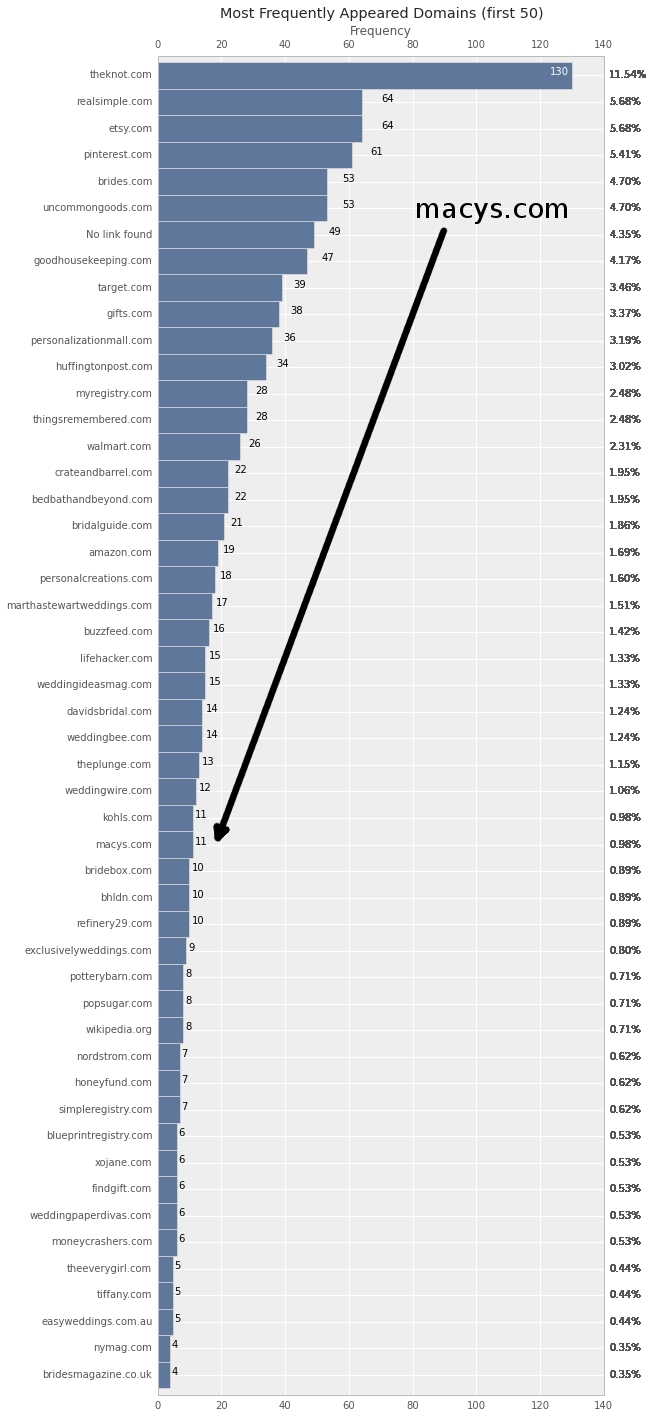

In [8]:
Image("img/wedding_bar.png")

### Macy's Rankings

* only 11 out of the 1411 records
* "wedding registry" brings up the best rank for https://www.macys.com/wedding-registry
* plural "gifts" is bad
* singular "gift" is better than registry
* but place "wedding" before "gift"

In [38]:
macys_df = wedding_df[wedding_df.Domain=='macys.com']
macys_df.sort('Rank')

,Keyword,Rank,Title,Link,Description,Domain
1054,wedding registry gift,4,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1094,wedding and gift registry,4,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1175,gift registry search,5,Registry Search - Macy's,www.macys.com/registry/wedding/registrysearch,back to macys.com; help; rewards program · reg...,macys.com
35,wedding gift registry,6,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
45,wedding registry finder,6,Registry Search - Macy's,www.macys.com/registry/wedding/registrysearch,back to macys.com; help; rewards program · reg...,macys.com
1087,gift registry wedding,7,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
1107,at home gift registry,7,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
28,wedding registry,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"Extra 15 percent off, Extra 10 percent off ele...",macys.com
938,wedding gift registries,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com
975,wedding gifts registry,9,"Macy's|Wedding Registry, Bridal Registry, wedd...",https://www.macys.com/wedding-registry,"The Registry Guide, create the registry of you...",macys.com


In [40]:
macys_df.Title.unique()

array(["Macy's|Wedding Registry, Bridal Registry, wedding gift, anniversary ...",
       "Registry Search - Macy's"], dtype=object)

In [44]:
macys_df.describe()

,Rank
count,11.000000
mean,6.909091
std,2.119177
min,4.000000
25%,5.500000
50%,7.000000
75%,9.000000
max,10.000000


In [39]:
macys_df.Link.unique()

array(['https://www.macys.com/wedding-registry',
       'www.macys.com/registry/wedding/registrysearch'], dtype=object)

In [43]:
macys_df.Description.unique()

array([ "Extra 15 percent off, Extra 10 percent off electrics, furniture and mattresses, \nexclusions. find. A COUPLE'S REGISTRY. guests start here! find a couple's \nregistry.",
       'The Registry Guide, create the registry of your dreams with our helpful tools, ... \nThe Wedding Shop, clothing, accessories, jewelry, gifts and more: everything you\n.',
       "back to macys.com; help; rewards program \xc2\xb7 registry manager \xc2\xb7 registry ... Look \nWhat's Happening at Macy's! you said yes? create your Macy's Wedding and Gift.",
       'The Registry Guide, create the registry of your dreams with our helpful tools, \npractical \xc2\xb7 Home Decorating, style quiz, find the perfect look for your newlywed \nlife,\xc2\xa0...'], dtype=object)

In [250]:
n_ratings = len(wedding_df.Rank.unique())

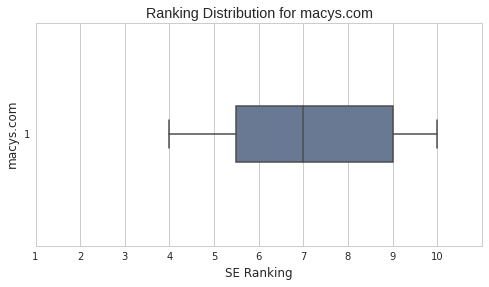

In [260]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")

ax = sns.boxplot(macys_df.Rank.values, vert=False, widths=0.25)
ax.set_xlim((1, n_ratings+1))
ax.set_xticks(range(1, n_ratings+1));
ax.set_title("Ranking Distribution for macys.com")
ax.set_ylabel("macys.com")
ax.set_xlabel("SE Ranking")

In [100]:
rank_df = wedding_df[['Domain', 'Rank']].groupby('Domain').agg(['mean', 'count'])
rank_df = pd.DataFrame({'Rank' : rank_df['Rank']['mean'], 'Appearance': rank_df['Rank']['count']})
rank_df.sort('Rank', inplace=True)

In [101]:
print rank_df.Appearance.mean()
print len(rank_df[rank_df.Appearance <= 5])
print len(rank_df[rank_df.Appearance > 5])

5.73577235772
201
45


* Domains appear ~5.7 times on average in the dataset
* 201 domains appear 5 times or less
* 45 domains appear more than 5 times

In [102]:
wedding_df2 = wedding_df.copy()
wedding_df2.groupby('Domain').Description.apply(len)
rank_df2 = wedding_df2[['Domain', 'Rank']].groupby('Domain').agg(['mean', 'count'])
rank_df2 = pd.DataFrame({'Rank' : rank_df2['Rank']['mean'], 'Appearance': rank_df2['Rank']['count']})

In [103]:
def count_words(series) : return 0 if str(series.values[0]) == 'nan' else len(series.values[0].split())
rank_df2['TitleWordCount'] = wedding_df2.groupby('Domain').Title.apply(count_words)
rank_df2['DescriptionWordCount'] = wedding_df2.groupby('Domain').Description.apply(count_words)

In [110]:
rank_df2.corr()

,Appearance,Rank,TitleWordCount,DescriptionWordCount
Appearance,1.000000,-0.119530,-0.081428,-0.068556
Rank,-0.119530,1.000000,0.169687,0.115181
TitleWordCount,-0.081428,0.169687,1.000000,0.136118
DescriptionWordCount,-0.068556,0.115181,0.136118,1.000000


In [111]:
rank_df2.sort('Rank', inplace=True) # sort by ascending rank

In [112]:
rank45_df = rank_df2[rank_df2.Appearance > 5] # drop domains that appear 5 times or less

In [123]:
rank45_df['Popularity'] = list(reversed(range(1, len(rank45_df)+1))) # popularity by increasing rank

/home/kevin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
rank45_df[['Popularity', 'Appearance', 'TitleWordCount', 'DescriptionWordCount']].corr()

,Popularity,Appearance,TitleWordCount,DescriptionWordCount
Popularity,1.000000,0.428969,-0.108642,-0.241652
Appearance,0.428969,1.000000,-0.195763,-0.086443
TitleWordCount,-0.108642,-0.195763,1.000000,0.039141
DescriptionWordCount,-0.241652,-0.086443,0.039141,1.000000


###Quantity vs Quality

####We define 'appearance' of a domain as the number of times it appears in our data.

####We define 'popularity' of a domain as its order, from a list of ascending rank mean values.

${r^2}_{\textrm{popularity, appearance}} \approx 0.43$

${r^2}_{\textrm{popularity, #title words}} \approx -0.11$

${r^2}_{\textrm{popularity, #description words}} \approx -0.24$

${r^2}_{\textrm{appearance, #title words}} \approx -0.20$

${r^2}_{\textrm{appearance, #description words}} \approx 0.09$

${r^2}_{\textrm{#title words, #description words}} \approx 0.04$

In [164]:
df_for_bubble_chart = rank45_df.copy()
df_for_bubble_chart['ID'] = df_for_bubble_chart.index
df_for_bubble_chart['Popularity'] = len(rank45_df) - df_for_bubble_chart['Popularity'] + 1
df_for_bubble_chart['Rank'] = rank45_df['Rank']
df_for_bubble_chart['Area'] = 'corresponds to # appearances'

In [165]:
!mkdir -p ./bubble

import csv
df_for_bubble_chart[['ID', 'Popularity', 'Rank', 'Area', 'Appearance']].to_csv('./bubble/bubble.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

import fileinput
import sys

for line in fileinput.input(['./bubble/bubble.csv'], inplace=True):
    sys.stdout.write('[{x}],'.format(x=line))
    sys.stdout.write('\n')

##### https://developers.google.com/chart/interactive/docs/gallery/bubblechart

In [171]:
from IPython.display import HTML

HTML("<iframe src=./bubble/bubble.html width=1290 height=500></iframe>")

### Descriptions vs Rankings

In [46]:
import nltk
import string
import re

def remove_numbers(s):
    return ''.join([i for i in s if not i.isdigit()])

def remove_punctuation(s):
    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    return s

def lowercase_remove_punctuation(s):
    try:
        #s = s.decode("utf8")
        s = s.decode('ascii', 'ignore')
    except:
        s = str(s)
        
    s = s.lower()
    s = s.strip()
    s = s.rstrip()
    s = s.lstrip()
    s = s.replace('\n', '')
    return remove_punctuation(s)

def lowercase_remove_punctuation_and_tokenize(s):
    token_list = nltk.word_tokenize(remove_numbers(lowercase_remove_punctuation(s)))
    return token_list

def lowercase_and_make_description_wordlist_for_rank_class(sub_dataframe):
    s = map(lowercase_remove_punctuation_and_tokenize, sub_dataframe.Description)
    description_wordlist = reduce(lambda description_wordlist, desc_wl : description_wordlist + Counter(desc_wl), s, Counter())
    return description_wordlist.most_common(len(description_wordlist))

In [89]:
rank_vs_description_wordlist = wedding_df[['Description', 'Rank']].groupby('Rank').apply(lowercase_and_make_description_wordlist_for_rank_class)
rank_vs_description_wordlist

Rank
1       [(wedding, 148), (the, 125), (gift, 109), (and...
2       [(wedding, 146), (the, 125), (and, 109), (a, 8...
3       [(wedding, 161), (the, 100), (gift, 99), (a, 9...
4       [(wedding, 157), (the, 133), (and, 106), (regi...
5       [(wedding, 176), (the, 136), (for, 107), (and,...
6       [(wedding, 165), (and, 114), (the, 112), (for,...
7       [(wedding, 187), (the, 121), (and, 113), (a, 1...
8       [(wedding, 165), (the, 110), (and, 102), (a, 9...
9       [(wedding, 170), (the, 124), (a, 111), (and, 1...
10      [(wedding, 145), (the, 141), (and, 109), (a, 9...
dtype: object

In [490]:
map(lambda wl : len(wl), rank_vs_description_wordlist)

[520, 686, 668, 696, 748, 776, 738, 762, 809, 799]

* Higher Ranked sites typically have smaller description vocabulary

In [90]:
def preprocess_and_concatenate_descriptions(subdataframe):
    s = map(lambda s : remove_numbers(lowercase_remove_punctuation(s)), subdataframe.Description)
    s = reduce(lambda all_description, description : all_description + ' ' + description, s, '')
    return s

s = wedding_df[['Description', 'Rank']].groupby('Rank').apply(preprocess_and_concatenate_descriptions)

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()
td_matrix = countvec.fit_transform(s.values)

In [61]:
map(lambda wclst : dict(wclst)['a'] , rank_vs_description_wordlist)

[49, 88, 96, 81, 92, 77, 107, 93, 111, 93]

In [96]:
td_df = pd.DataFrame(td_matrix.toarray().T, columns=range(1, 11), index=countvec.get_feature_names())

In [98]:
td_df.loc['a'] = map(lambda wclst : dict(wclst)['a'], rank_vs_description_wordlist)

In [101]:
topn = 15
topn_words_for_all_ranks_combined = reduce(lambda s, wclist : s | set(map(lambda wc : wc[0], wclist[:topn])), rank_vs_description_wordlist, set())

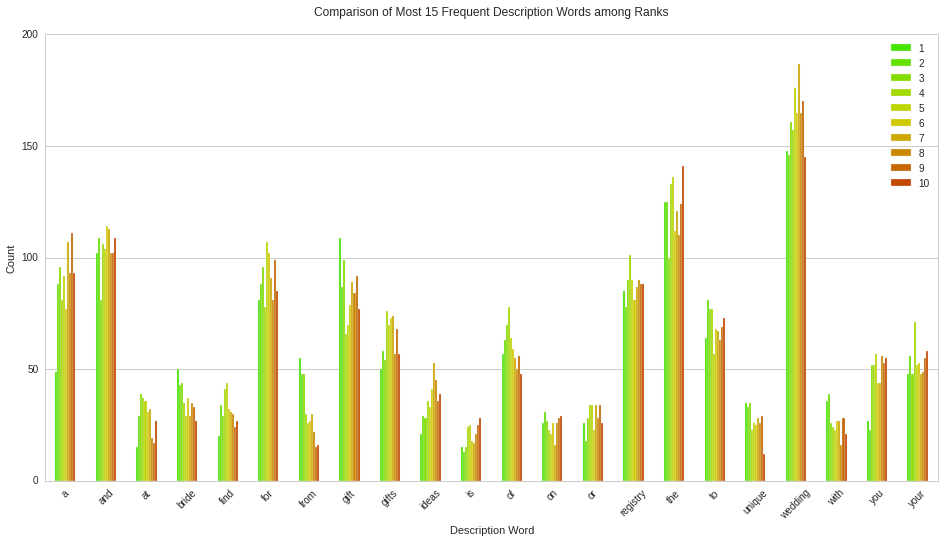

In [102]:
sns.set_style("whitegrid")

my_colors = ['#45E500', '#65E100', '#84DD00', '#A2D900', '#BED500', '#D2CA00', '#CEA800', '#CA8700', '#C66700', '#C24900', '#BF2C00']
ax = td_df.ix[sorted(topn_words_for_all_ranks_combined)].plot(kind='bar', figsize=(12, 8), color=my_colors)
fig = plt.gcf()
fig.set_size_inches(16, 8)
ax.set_ylabel("Count")
ax.set_xlabel("Description Word")
ax.get_lines()[0].set_visible(False)
ax.xaxis.grid(False)
plt.xticks(rotation=45);
plt.title("Comparison of Most {0} Frequent Description Words among Ranks\n".format(topn))
plt.savefig('comparison_frequent_words.png', type='png')

### Title vs Rankings

In [103]:
def lowercase_and_make_title_wordlist_for_rank_class(sub_dataframe):
    s = map(lowercase_remove_punctuation_and_tokenize, sub_dataframe.Title)
    description_wordlist = reduce(lambda description_wordlist, desc_wl : description_wordlist + Counter(desc_wl), s, Counter())
    return description_wordlist.most_common(len(description_wordlist))

rank_vs_title_wordlist = wedding_df[['Title', 'Rank']].groupby('Rank').apply(lowercase_and_make_title_wordlist_for_rank_class)
rank_vs_title_wordlist

Rank
1       [(wedding, 86), (gift, 78), (for, 64), (regist...
2       [(wedding, 100), (the, 61), (gift, 60), (regis...
3       [(wedding, 95), (gift, 60), (registry, 58), (f...
4       [(wedding, 112), (registry, 63), (gift, 53), (...
5       [(wedding, 115), (registry, 61), (gift, 56), (...
6       [(wedding, 114), (registry, 64), (gift, 46), (...
7       [(wedding, 118), (registry, 64), (gift, 53), (...
8       [(wedding, 126), (gifts, 60), (registry, 53), ...
9       [(wedding, 123), (gift, 60), (registry, 54), (...
10      [(wedding, 120), (registry, 55), (gifts, 46), ...
dtype: object

In [104]:
def preprocess_and_concatenate_titles(subdataframe):
    s = map(lambda s : remove_numbers(lowercase_remove_punctuation(s)), subdataframe.Title)
    s = reduce(lambda all_description, description : all_description + ' ' + description, s, '')
    return s

s = wedding_df[['Title', 'Rank']].groupby('Rank').apply(preprocess_and_concatenate_titles)

In [105]:
countvec = CountVectorizer()
td_matrix = countvec.fit_transform(s.values)
td_df = pd.DataFrame(td_matrix.toarray().T, columns=range(1, 11), index=countvec.get_feature_names())

In [106]:
td_df.loc['a'] = map(lambda wclist : dict(wclist)['a'], rank_vs_title_wordlist)

In [107]:
topn = 15
topn_words_for_all_ranks_combined = reduce(lambda s, wclist : s | set(map(lambda wc : wc[0], wclist[:topn])), rank_vs_title_wordlist, set())

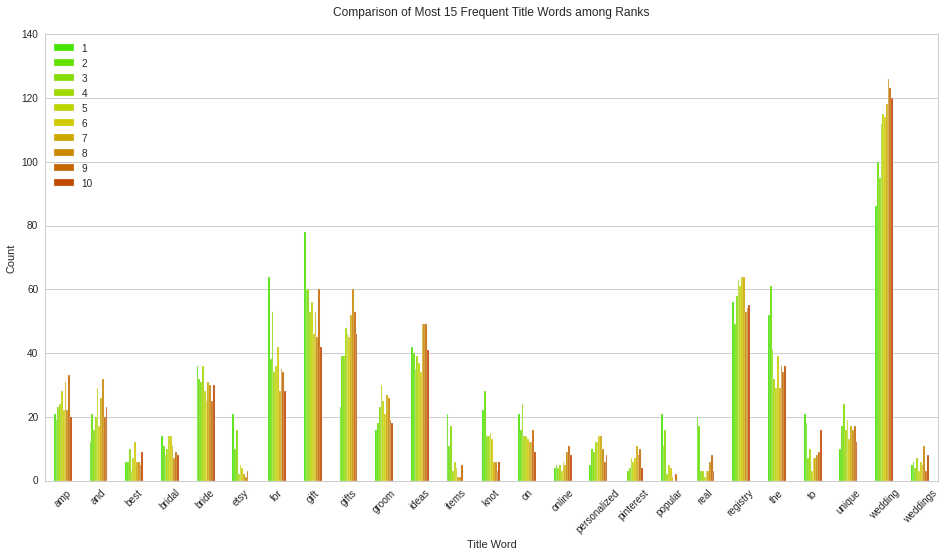

In [108]:
my_colors = ['#45E500', '#65E100', '#84DD00', '#A2D900', '#BED500', '#D2CA00', '#CEA800', '#CA8700', '#C66700', '#C24900', '#BF2C00']
ax = td_df.ix[sorted(topn_words_for_all_ranks_combined)].plot(kind='bar', figsize=(12, 8), color=my_colors)
fig = plt.gcf()
fig.set_size_inches(16, 8)
ax.set_ylabel("Count")
ax.set_xlabel("Title Word")
ax.get_lines()[0].set_visible(False)
ax.xaxis.grid(False)
plt.xticks(rotation=45);
plt.title("Comparison of Most {0} Frequent Title Words among Ranks\n".format(topn))
plt.savefig('title_frequent_words.png', type='png')

* use ampersands instead of 'and' ?
* knot is popular
* gift is popular

### Wordclouds of Rankings' Descriptions

In [608]:
import os

for rank in range(n_ratings):
    bigrams = ["%s %s" % bi for bi in nltk.bigrams(nltk.tokenize.word_tokenize(s[rank+1]))]
    bigrams_df = pd.DataFrame.from_dict(Counter(bigrams).most_common(len(s[rank+1])))
    bigrams_df.to_csv('{0}_bigrams.csv'.format(rank+1), index=False)
    
    trigrams = ["%s %s %s" % tri for tri in nltk.trigrams(nltk.tokenize.word_tokenize(s[rank+1]))]
    trigrams_df = pd.DataFrame.from_dict(Counter(trigrams).most_common(len(s[rank+1])))
    trigrams_df.to_csv('{0}_trigrams.csv'.format(rank+1), index=False)    

!ls *bigrams.csv *trigrams.csv

10_bigrams.csv	 2_bigrams.csv	 4_bigrams.csv	 6_bigrams.csv	 8_bigrams.csv
10_trigrams.csv  2_trigrams.csv  4_trigrams.csv  6_trigrams.csv  8_trigrams.csv
1_bigrams.csv	 3_bigrams.csv	 5_bigrams.csv	 7_bigrams.csv	 9_bigrams.csv
1_trigrams.csv	 3_trigrams.csv  5_trigrams.csv  7_trigrams.csv  9_trigrams.csv


In [632]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [590]:
%%R
library(tm)
library(wordcloud)
library(RColorBrewer)

Loading required package: NLP
Loading required package: RColorBrewer


In [625]:
topn_words = 50

In [627]:
%%R -i n_ratings,topn_words

palettes <- colorRampPalette( c("green", "red"), space="rgb")(n_ratings)

for (rank in 1:n_ratings) {
    rank.bigrams.path <- paste(rank, '_bigrams.csv',sep='')
    rank.trigrams.path <- paste(rank, '_trigrams.csv',sep='')
    rank.bigrams.df <- read.csv(rank.bigrams.path)
    rank.trigrams.df <- read.csv(rank.trigrams.path)
    rank.wordcloud.df <- rbind(rank.bigrams.df[1:topn_words,], rank.trigrams.df[1:topn_words,])
    rank.wordcloud.df <- rank.wordcloud.df[with(rank.wordcloud.df, order(-X1, X0)),]
    
    pal <- palettes[rank]
    png(paste(rank, '_rank_wordcloud.png',sep=''), width=960, height=960)
    wordcloud(rank.wordcloud.df$X0, rank.wordcloud.df$X1 , max.words=200, colors=pal)
    dev.off()
}

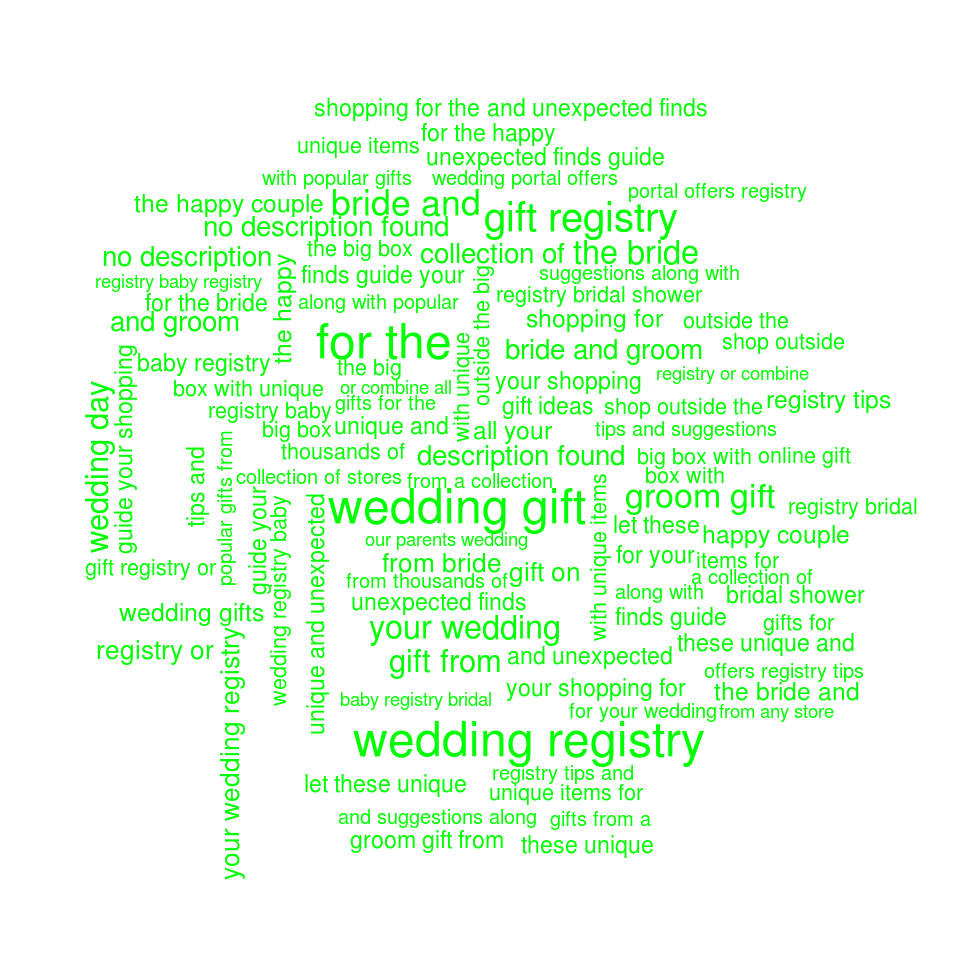

In [629]:
Image("/home/kevin/macys/wordclouds/1_rank_wordcloud.png")

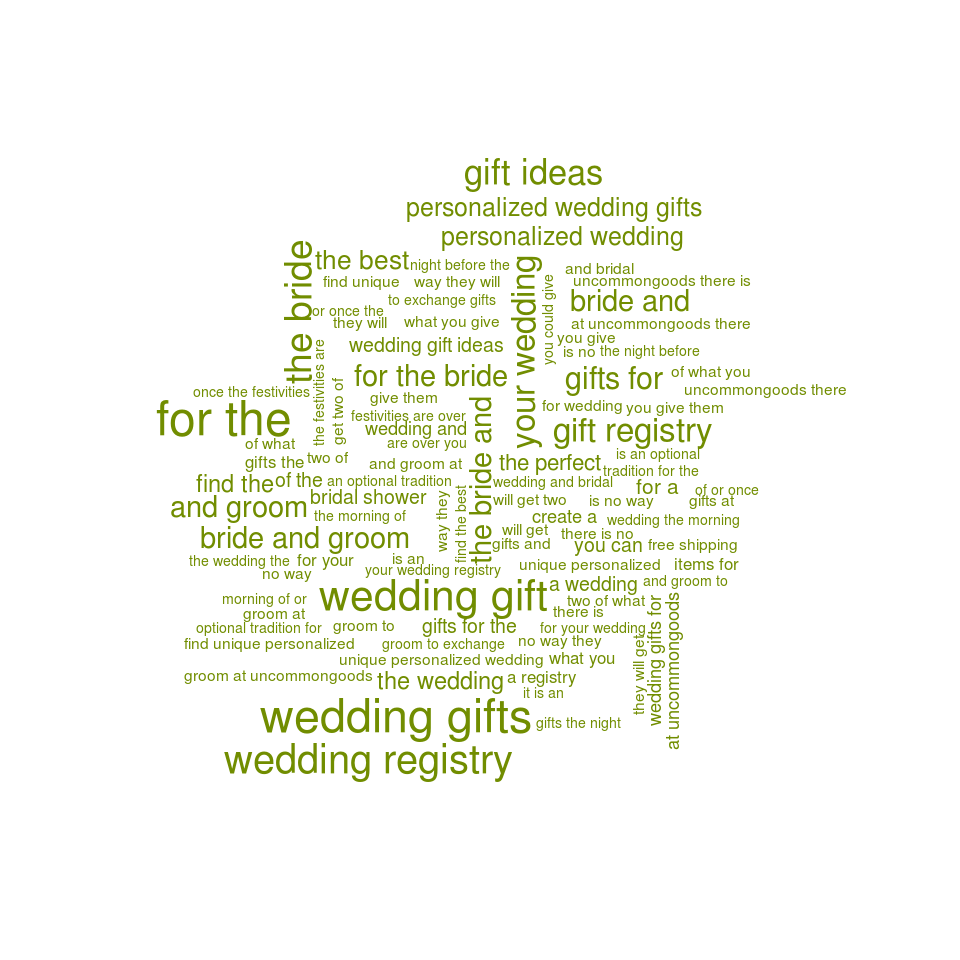

In [630]:
Image("/home/kevin/macys/wordclouds/5_rank_wordcloud.png")

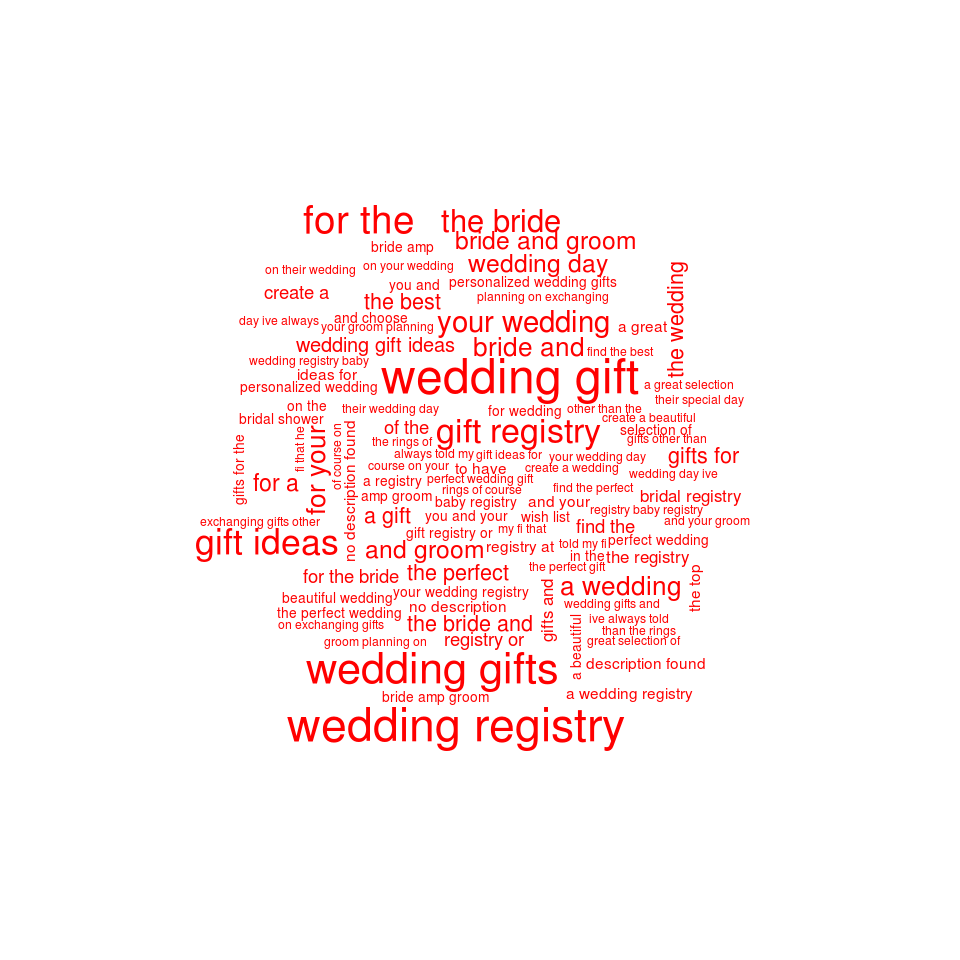

In [631]:
Image("/home/kevin/macys/wordclouds/10_rank_wordcloud.png")

### Domain-Description Similarity (MDS)

tutorial: http://blog.whn.se/post/28851413626/k-means-clustering-in-r

http://stackoverflow.com/questions/9019632/how-to-create-a-cluster-plot-in-r

http://www.r-bloggers.com/multidimensional-scaling-mds-with-r/

In [208]:
gb_rank45_domains = wedding_df[['Description', 'Domain']].set_index('Domain').ix[rank45_df.index].reset_index().groupby('Domain')
s = gb_rank45_domains.apply(preprocess_and_concatenate_descriptions)

countvec = CountVectorizer()
td_matrix = countvec.fit_transform(s.values)
td_df = pd.DataFrame(td_matrix.toarray(), index=s.index, columns=countvec.get_feature_names())
td_df = td_df.reset_index()
td_df.index = range(1, len(td_df)+1)
td_df.to_csv("./data/domain_description_td_matrix.csv", index=True, quoting=csv.QUOTE_NONNUMERIC)

In [210]:
%load_ext rpy2.ipython

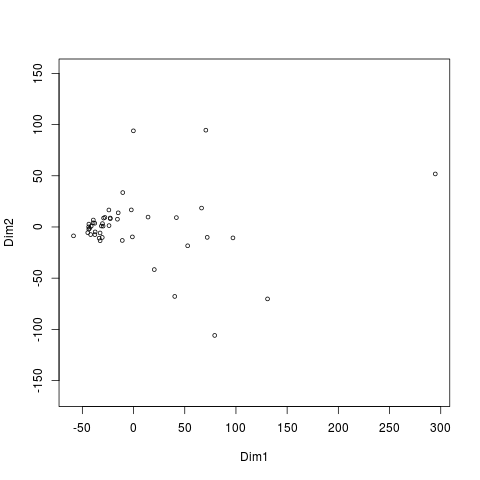

In [511]:
%%R
ordiplot(dd_df.mds)

* ~30 points for $(x,y) \in [-50, 0] \times [0, 20]$ and ~20 points outside that box

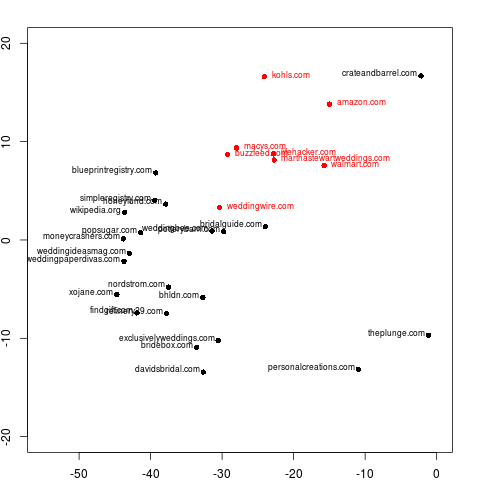

In [578]:
%%R
library(readr)
library(wordcloud)
library(directlabels)

dd_df <- read_csv("./data/domain_description_td_matrix.csv")
dd_df.dist <- dist(dd_df[,-c(1,2)])
dd_df.mds <- cmdscale(dd_df.dist, eig = TRUE, k = 2)

#opar <- par()
par(pin = c(5.9, 5.9))
#plot(dd_df.mds, ylim=c(-50, 100), xlim=c(-50,0), xlab="Dim1", ylab="Dim2", pch=16, color='red')
#text(dd_df.mds[21,1], dd_df.mds[21,2], pos=4, labels=c('macys.com'))# dd_df$Domain
#ordiplot(dd_df.mds, labels=dd_df$Domain)
macys_neighborhood = (dd_df.mds$points[, 1] > -35) & (dd_df.mds$points[, 1] < -10) & (dd_df.mds$points[,2] < 20) & (dd_df.mds$points[,2] > 2)


# stats.stackexchange.com/questions/16057/how-do-i-avoid-overlapping-labels-in-an-r-plot

#textplot(dd_df.mds$points[macys_neighborhood, 1],
#         dd_df.mds$points[macys_neighborhood, 2],
#         dd_df$Domain[macys_neighborhood], xlim=c(-50,0), ylim=c(-20,40))

plot(dd_df.mds$points[macys_neighborhood,1], dd_df.mds$points[macys_neighborhood,2], col='red',xlim=c(-55,0), ylim=c(-20,20), pch=16)
text(dd_df.mds$points[macys_neighborhood,1], dd_df.mds$points[macys_neighborhood,2]+.1, labels=dd_df$Domain[macys_neighborhood],col='red', pos=4,pchar=16,cex=0.7)
points(dd_df.mds$points[!macys_neighborhood,1], dd_df.mds$points[!macys_neighborhood,2], col='black', pch=16)
text(dd_df.mds$points[!macys_neighborhood,1]+.5, dd_df.mds$points[!macys_neighborhood,2]+.2, labels=dd_df$Domain[!macys_neighborhood],col='black', pos=2,pchar=16,cex=0.7)

#textxy(dd_df.mds$points[macys_neighborhood,1], dd_df.mds$points[macys_neighborhood,2], dd_df$Domain[macys_neighborhood])

### Domain Dendrogram

In [562]:
import clusters

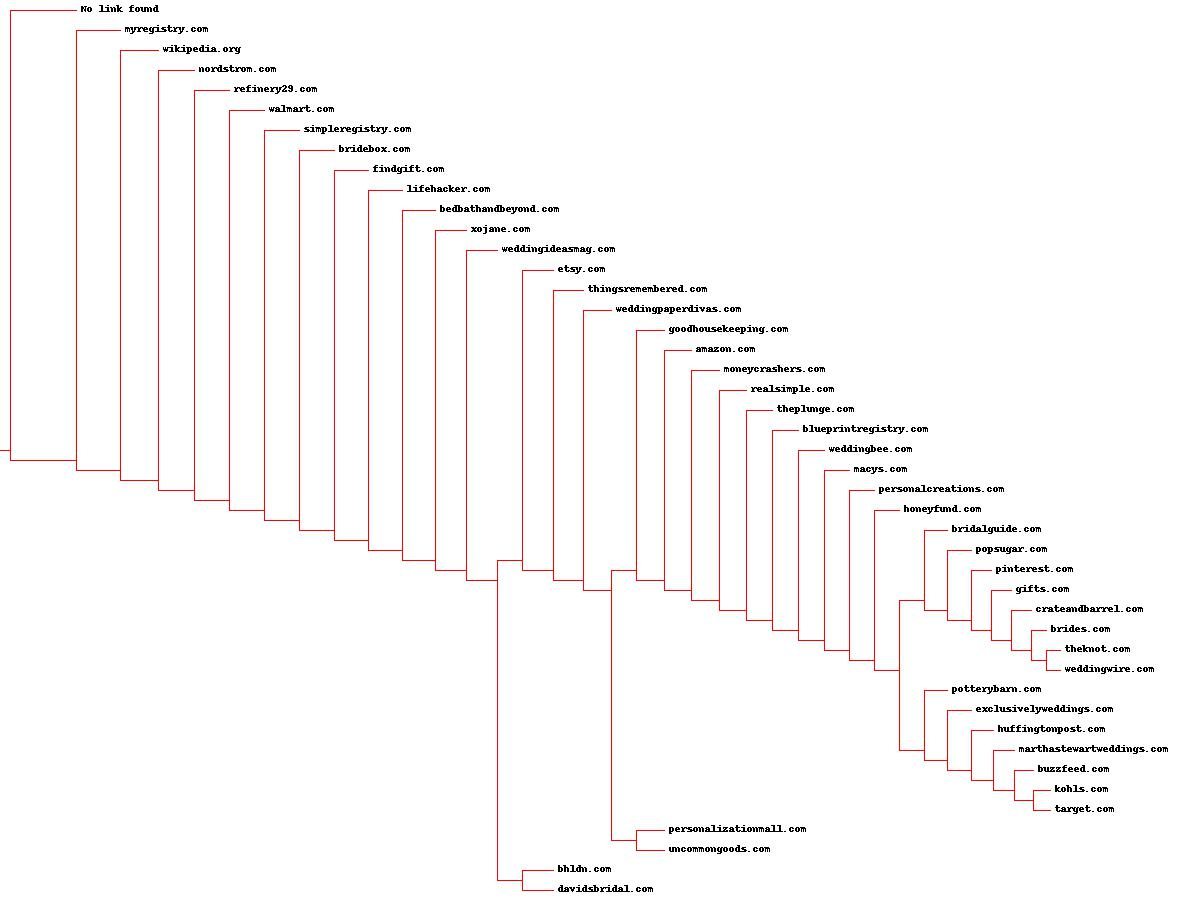

In [565]:
domains = td_df.Domain.values
data = td_matrix.toarray()

reload(clusters)

clust = clusters.hcluster(data)
clusters.drawdendrogram(clust, domains, jpeg='domainclust.jpg')

Image('domainclust.jpg')

* both the dendrogram and MDS show there are ~4-5 clusters of domains

### LDA Visualization
##### Note:  More Tips for Exploring Text Data
http://blog.kaggle.com/2015/08/18/crowdflower-scripts-approaching-nlp/

http://cpsievert.github.io/LDAvis/reviews/reviews.html

In [ ]:
!mkdir lda

In [648]:
%%R
### kaggle script
# https://www.kaggle.com/solution/crowdflower-search-relevance/lda-visualization/code

### reference site
#http://cpsievert.github.io/LDAvis/reviews/reviews.html

library(readr)
library(tm)
library(SnowballC)
library(Matrix)
library(lda)
library(LDAvis)
library(servr)

# read data
train = read_csv("data/WeddingScrapeWithDomain.csv");
#test = read_csv("test.csv");

txt = paste(train$Domain,train$Description);
#txt = c(txt,paste(test$query,test$product_title));


# pre-processing
txt <- gsub("'", "", txt)  # remove apostrophes
txt <- gsub("[[:punct:]]", " ", txt)  # replace punctuation with space
txt <- gsub("[[:cntrl:]]", " ", txt)  # replace control characters with space
txt <- gsub("^[[:space:]]+", "", txt) # remove whitespace at beginning of documents
txt <- gsub("[[:space:]]+$", "", txt) # remove whitespace at end of documents
txt <- tolower(txt)  # force to lowercase

# tokenize on space and output as a list:
doc.list <- strsplit(txt, "[[:space:]]+")

# compute the table of terms:
term.table <- table(unlist(doc.list))
term.table <- sort(term.table, decreasing = TRUE)

# stop words
stop_words = c('http','www','img','border','color','style','padding','table','font','thi','inch','ha','width','height')
stop_words <- c(stop_words, stopwords("SMART"))

# remove terms that are stop words or occur fewer than 5 times:
del <- names(term.table) %in% stop_words | term.table < 5
term.table <- term.table[!del]
vocab <- names(term.table)

# now put the documents into the format required by the lda package:
get.terms <- function(x) {
  index <- match(x, vocab)
  index <- index[!is.na(index)]
  rbind(as.integer(index - 1), as.integer(rep(1, length(index))))
}
documents <- lapply(doc.list, get.terms)



# Compute some statistics related to the data set:
D <- length(documents) # number of documents
W <- length(vocab)  # number of terms in the vocab
doc.length <- sapply(documents, function(x) sum(x[2, ]))  # number of tokens per document
N <- sum(doc.length)  # total number of tokens in the data
term.frequency <- as.integer(term.table) # frequencies of terms in the corpus

# MCMC and model tuning parameters:
K <- 7
G <- 1000
alpha <- 0.02
eta <- 0.02

# Fit the model:
set.seed(357)
t1 <- Sys.time()
fit <- lda.collapsed.gibbs.sampler(documents = documents, K = K, vocab = vocab, 
                                   num.iterations = G, alpha = alpha, 
                                   eta = eta, initial = NULL, burnin = 0,
                                   compute.log.likelihood = TRUE)
t2 <- Sys.time()
t2 - t1  


### Visualizing the fitted model with LDAvis
theta <- t(apply(fit$document_sums + alpha, 2, function(x) x/sum(x)))
phi <- t(apply(t(fit$topics) + eta, 2, function(x) x/sum(x)))

results <- list(phi = phi,
                theta = theta,
                doc.length = doc.length,
                vocab = vocab,
                term.frequency = term.frequency)


# create the JSON object to feed the visualization:
json <- createJSON(phi = results$phi, 
                   theta = results$theta, 
                   doc.length = results$doc.length, 
                   vocab = results$vocab, 
                   term.frequency = results$term.frequency)

serVis(json, out.dir = './', open.browser = FALSE)
system("mv index.html ./lda/results.html")

In [ ]:
!cp d3.v3.js lda.css lda.json ldavis.js ./lda

In [23]:
HTML("<iframe src=./lda/results.html width=1290 height=1000></iframe>")